
# Project: Investigate a Dataset - No-show appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project is to investigate a no-show appointments dataset from Kaggle. The appointments were conducted in Brazil with over 100 thousand appointments. The project is to investigate any relations or factors that affected medical appointments. 

### Questions I will answer for the project:
1. Is gender a factor contribute to no-show appointments?
2. Is SMS confirmation a factor to no-show appointments?
3. Is age a factor to no-show appointments?
4. Do pre-existing conditions contribute to no-show appointments?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section, I'm going to check the data and clean up the data. I'm going to perform some steps to check the data before I clean up.

### General Properties

I load the data and have a quick look at the data

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

#   types and look for instances of missing or possibly errant data.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


There is a typo in the header. It should be 'Hypertension' instead of 'Hipertension'. It will be corrected later. Now that I have a quick overview of total rows and columns.

In [3]:
# quick check number of rows and columns.
df.shape

(110527, 14)

The dataset has total 110,527 rows and 14 columns. Data type needs to be checked.

In [4]:
# check data type of columns.
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

All columns that have data type as object need to be checked.

In [5]:
# quick check all columns have data type as objact, confirm they are string.
type(df['Gender'][0])

str

In [6]:
type(df['ScheduledDay'][0])

str

In [8]:
type(df['AppointmentDay'][0])

str

In [7]:
type(df['Neighbourhood'][0])

str

In [9]:
type(df['No-show'][0])

str

ScheduledDay and AppointmentDay will have to be cleaned up later. They have to be converted to datetime data type.

In [10]:
# check columns with missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [11]:
# check number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

All appointment IDs are unique, no duplicate appointment IDs.

In [12]:
# descriptive statistics for each column of data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


There is a problem with age. minimum age is a negative number. Age will be cleaned later.

### Data Cleaning (Replace this with more specific notes!)

In [13]:
# correct typo, rename the column from 'Hipertension' to 'Hypertension'
df.rename(columns={'Hipertension': 'Hypertension'}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
The typo has been corrected to make it easier to read.

In [14]:
#change data type of ScheduleDay and AppointmentDay to datetime data type
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

Data type of ScheduledDay and AppointmentDay have been corrected to datetime data type.

In [15]:
#identify rows with negative age
negative_age_rows = df[df['Age'] < 0].index

#drop rows with negative age
df.drop(negative_age_rows, inplace = True)

#quick check dataframe after removing negative age rows
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Negative age was removed to have better analysis. In this research, I'm going to focus on the relationship between gender, age, scholarship, conditions, and SMS status to no-show appointment. I'm going to remove patient IDs, appointment IDs, schedule day, appointment day, and neighborhood to move the dataset simpler to analyze.

In [16]:
#remove extra columns that we don't need for the project.
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'Alcoholism', 'Handcap'], axis = 1, inplace = True)
df.head()

,Gender,Age,Scholarship,Hypertension,Diabetes,SMS_received,No-show
0,F,62,0,1,0,0,No
1,M,56,0,0,0,0,No
2,F,62,0,0,0,0,No
3,F,8,0,0,0,0,No
4,F,56,0,1,1,0,No


I change No-show column value from 'Yes' to 1 and 'No' to 0 to make the dataframe consistent and easy to follow.

In [17]:
#replace values in No-show column from 'Yes' and 'No' to 1 and 0
df['No-show'].replace({'Yes': 1, 'No' : 0}, inplace=True)
df.head()

,Gender,Age,Scholarship,Hypertension,Diabetes,SMS_received,No-show
0,F,62,0,1,0,0,0
1,M,56,0,0,0,0,0
2,F,62,0,0,0,0,0
3,F,8,0,0,0,0,0
4,F,56,0,1,1,0,0


<a id='eda'></a>
## Exploratory Data Analysis

First, I'm going to look at the percentage of no-show appointments to figure out if we have a very high no-show rate or not.

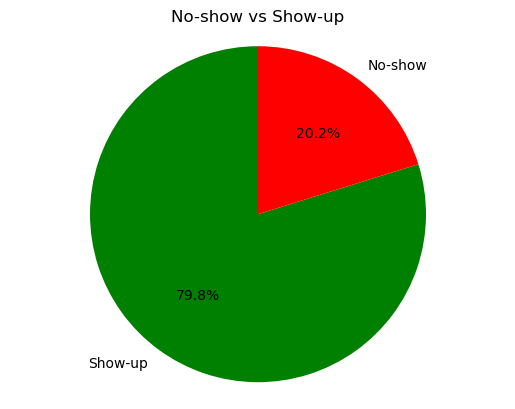

In [18]:
#plot pie chart to get the percentage of no-show appointment
#count the number of show-up and no-show in the 'No-show' column
no_show_counts = df['No-show'].value_counts()

#create a pie chart
plt.pie(no_show_counts, labels = ['Show-up', 'No-show'], startangle = 90, colors = ['green', 'red'], autopct= '%1.1f%%')

plt.axis('equal')

plt.title('No-show vs Show-up')

plt.show()

We have a very high percent of No-show appointment. No-show accounts to 20.2% of total appointment. We have to dive in more to figure out if gender, SMS confirmation, age, and pre-existing conditions contribute to the No-show appointments.

### Is gender a factor contribute to no-show appointments?

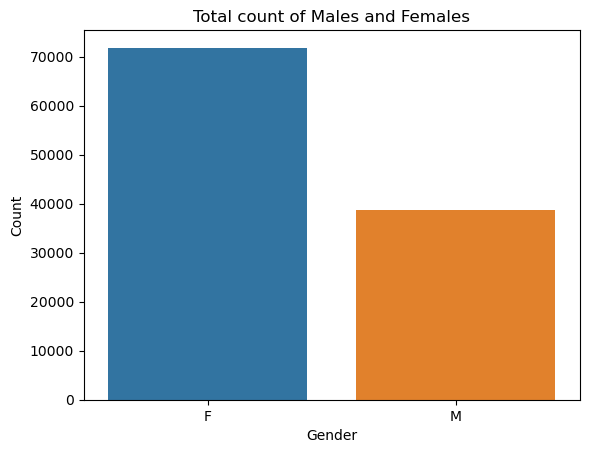

In [19]:
#plot bar chart to compare total male and female patients
gender_counts = df['Gender'].value_counts()

sns.barplot(x = gender_counts.index, y = gender_counts.values)

plt.title('Total count of Males and Females')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

Total females appointments are about 40% higher than male appointments. Now we're going to check to see the percentage of males and females in No-show appointments.

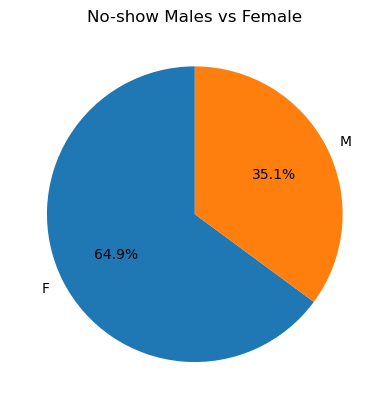

In [20]:
#filter the dataframe to only have 'No-show'
no_show_df = df[df['No-show'] == 0]

#count the number of females and males in 'No-show' appointments
sorted_counts = no_show_df['Gender'].value_counts().sort_index()

#plot the sorted counts as pie chart
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct = '%1.1f%%')

plt.title('No-show Males vs Female')
plt.show()

The chart shows that more females don't show up at the appointment than males. It does make sense because we have a lot more female appointments than male appointments.

### Is SMS confirmation a factor to no-show appointments?

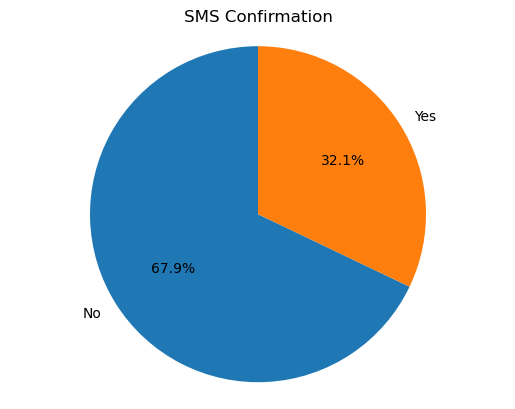

In [21]:
#plot pie chart for SMS-received
sms_received_counts = df['SMS_received'].value_counts()

plt.pie(sms_received_counts, labels = ['No', 'Yes'], startangle = 90, autopct = '%1.1f%%')
plt.title('SMS Confirmation')
plt.axis('equal')

plt.show()

There is a huge amount of appointments that patients don't received SMS confirmation. It's very likely because of that, they don't show up at the appointment. I'm going to analyze deeper to figure the relation between confirmation and No-show

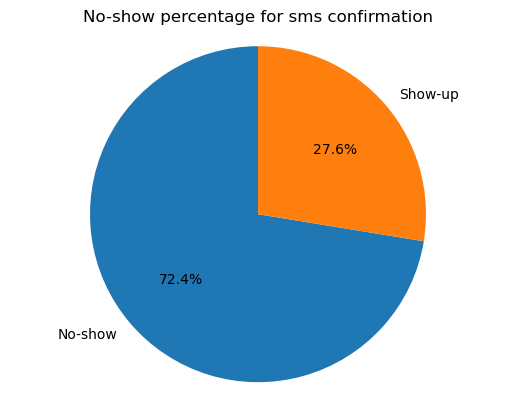

In [22]:
#filter the dataframe to only have 'SMS_received'
sms_received_df = df[df['SMS_received'] == 1]

#count the sms_received in 'No-show' appointments
sorted_counts = sms_received_df['No-show'].value_counts()

plt.pie(sorted_counts, labels={'No-show': 1, 'Show-up': 0}, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.title('No-show percentage for sms confirmation')
plt.show()

The chart clearly shows that even the patients received SMS confirmation, a lot of them still do not show up.

### Is age a factor to no-show appointments?
First, we are going to have a quick overview of all patient age.

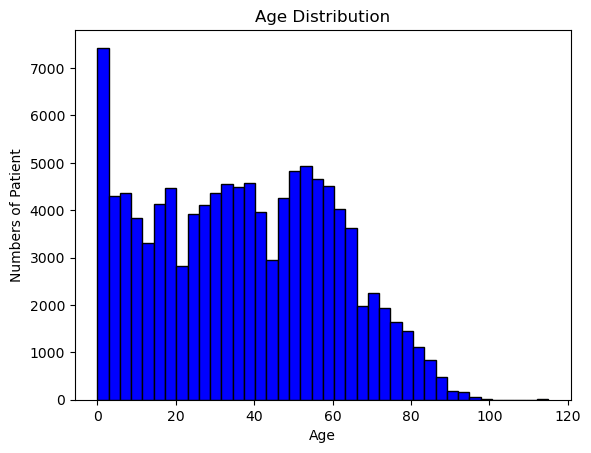

In [23]:
#plot the histogram chart
plt.hist(df['Age'], bins = 40, color = 'blue', edgecolor = 'black')
plt.xlabel('Age')
plt.ylabel('Numbers of Patient')
plt.title('Age Distribution')

plt.show()

Age is very likely to be a huge factor that affect the appointment. I'm going categorize age into 3 groups. 0 to 17 is group A. 18 to 65 is group B. 65 to 115 is group C.

In [24]:
#define the age group and labels
bins = [0, 17, 65, 115]
labels = ['A', 'B', 'C']

#create age_group' column
df['Age_group'] = pd.cut(df['Age'], bins = bins, labels = labels, right = False)
df.head()

,Gender,Age,Scholarship,Hypertension,Diabetes,SMS_received,No-show,Age_group
0,F,62,0,1,0,0,0,B
1,M,56,0,0,0,0,0,B
2,F,62,0,0,0,0,0,B
3,F,8,0,0,0,0,0,A
4,F,56,0,1,1,0,0,B


Now I'm going to look at No-show appointment to see which group contributes the most and the least.

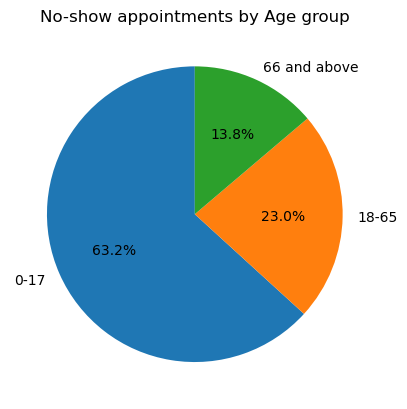

In [25]:
#filter the dataframe to only have 'No-show'
no_show_df = df[df['No-show'] == 0]
age_counts = no_show_df['Age_group'].value_counts()

#plot a pie chart
plt.pie(age_counts, labels = {'0-17': 'A', '18-65': 'B','66 and above': 'C'}, startangle = 90, autopct = '%1.1f%%')
plt.title('No-show appointments by Age group')
plt.show()

Group 0-17 is the group that doesn't show up at the appointment the most. That group is not adult, it does depend on adults to come to the appointment.

### Do pre-existing conditions contribute to no-show appointments?
In this final question, I'm going to analyze to see if pre-existing conditions motivate the patients to keep the appointment instead of no-show. I'm going to create a new column called 'Pre-existing'. The column will contain 0 as no pre-existing condition, 1 as has either hypertension or diabetes, 2 as both conditions.

In [26]:
#create a new column called 'Pre-existing cons'. The column is the sum of hypertension and diabetes
df['Pre-existing'] = df['Hypertension'] + df['Diabetes']
df.head()

,Gender,Age,Scholarship,Hypertension,Diabetes,SMS_received,No-show,Age_group,Pre-existing
0,F,62,0,1,0,0,0,B,1
1,M,56,0,0,0,0,0,B,0
2,F,62,0,0,0,0,0,B,0
3,F,8,0,0,0,0,0,A,0
4,F,56,0,1,1,0,0,B,2


I'm going to lot a pie chart of no-show and show-up for group that doesn't have pre-existing conditions.

Since I'm plotting 3 pie charts, I'm going to define a function to make my task quicker and simpler.

In [27]:
#define plot_pie_chart function
def plot_pie_chart(data, labels, title):
    plt.pie(data, labels = labels, startangle = 90, autopct = '%1.1f%%')
    plt.title(title)
    plt.axis('equal')
    plt.show()

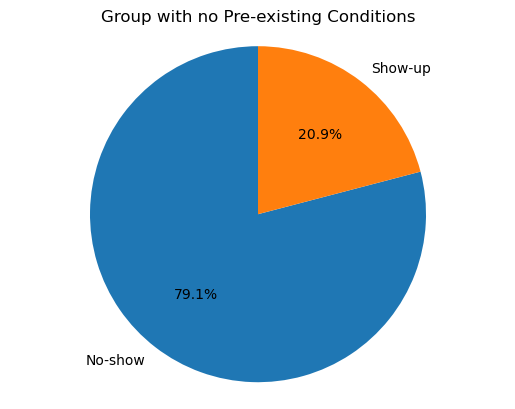

In [31]:
#filter the dataframe to only include row where pre-existing group as 0
pre_df_0 = df[df['Pre-existing'] == 0]

no_show_counts_0 = pre_df_0['No-show'].value_counts()

plot_pie_chart(no_show_counts_0, {'No-show': 0, 'Show-up': 1}, 'Group with no Pre-existing Conditions')


I'm going to plot the same chart type for group that has either hypertension or diabetes

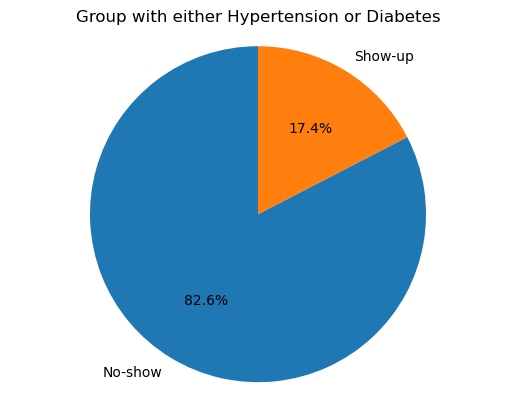

In [32]:
#filter the dataframe to only include row where pre-existing group as 1
pre_df_1 = df[df['Pre-existing'] == 1]

no_show_counts_1 = pre_df_1['No-show'].value_counts()

plot_pie_chart(no_show_counts_1, {'No-show': 0, 'Show-up': 1}, 'Group with either Hypertension or Diabetes')

The last group, which has both conditions

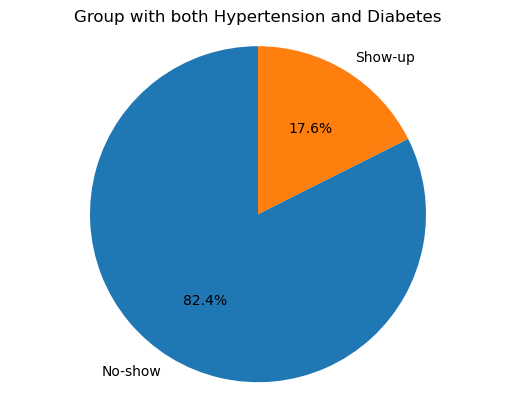

In [33]:
#filter the dataframe to only include row where pre-existing group as 2
pre_df_2 = df[df['Pre-existing'] == 2]

no_show_counts_2 = pre_df_2['No-show'].value_counts()

plot_pie_chart(no_show_counts_2, {'No-show': 0, 'Show-up': 1}, 'Group with both Hypertension and Diabetes')

After comparing 3 charts. Patient with pre-existing conditions actually show-up less than patient without any pre-existing conditions. however, the percentage difference is low. The difference is only 3%.

<a id='conclusions'></a>
## Conclusions

In this project, I analyzed dataset from Kaggle about No-show appointment. The purpose of the project was to find and factor that affects the appointment. After analyzing the dataset, question number 3 provided a clear picture that age plays a very important role. Group age from 0 to 17, which depends on adult to show up at the appointment is the group that missed the appointment the most.

Gender, SMS confirmation, and pre-existing condition don't provide a clear result if they affect the appointment or not. A more comprehensive research on the dataset is needed to find any relation between them and the appointment.

There are some limitations from the dataset. The data I have is from 2016. Recent updated data would provide a clearer picture than the data set 7 years ago. I removed appointment date because the column didn't provide the time of the appointment. I think the time is a cruicial part why patient show up or skip the appointment.
